# Thermal Physics - Homework 10
> Alfaifi, Ammar - 201855360

In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Math
from scipy import constants as con
from scipy.integrate import quad
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('pdf')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
sns.set_theme()
set_matplotlib_formats('svg', 'pdf')

## Question 1
The change in pressure is 
$$
 P_2 - P_1 = \rho g \Delta{h}
$$
And also is given by
$$
 P_2 - P_1 = \frac{n_B RT}{V}
$$
Combine those two,
$$
    \rho g \Delta{h} = \frac{n_B RT}{V}
$$

By definition number of solute moles equals the mass of the solute per molecular weight, $n_B = m/M$, so
$$
    \rho g \Delta{h} = \frac{m RT}{VM}
$$

The concentration $c$ equals the mass divided by the volume of the solution,
$$
    c = \frac{\rho g M}{RT} \delta{h}
$$
Now for the given data we plot them to find the best-fit line's slop.

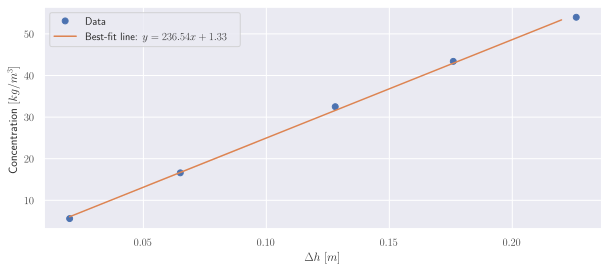

In [18]:
dh = np.array([2.0, 6.5, 12.8, 17.6, 22.6]) / 100
c = np.array([5.6, 16.6, 32.5, 43.4, 54.0]) * 1
dh_range = np.arange(dh[0], dh[-1], 0.1)
m, b = np.polyfit(dh, c, deg=1)

plt.plot(dh, c, 'o', label='Data')
plt.plot(dh_range, m * dh_range + b, label=f'Best-fit line: $y={m:.2f}x + {b:.2f}$')
plt.xlabel(r'$\Delta{h}$ $[m]$')
plt.ylabel(r'Concentration $[kg/m^3]$')
plt.legend()
plt.show()

So we conclude that 
$$
    \frac{\rho g M}{RT} = 236.54 \quad \Rightarrow \quad
        M = 236.54 \frac{RT}{\rho g} = 236.54 \frac{R \cdot 276.15}{997 * 9.8}
$$
So we have

In [59]:
T = con.convert_temperature(3, 'c', 'k')
Math(r'\frac{\rho g M}{RT}=%.2f' % (m * con.R * T / 997 / 9.8))

<IPython.core.display.Math object>

## Question 3
### (a)
For simplification we define $v_0 = \sqrt{2kT/m}$, where $T=300$ K and atomic mass of nitrogen is 28u. So

In [147]:
m = 28 * con.atomic_mass
v0 = np.sqrt(2 * 300 * con.k / m)
Math(r'v_0 = v_{max}= \sqrt{\frac{2kT}{m}} = %.2f' % v0)

<IPython.core.display.Math object>

### (b)

In [131]:
# Define maxwell speed distribution
def maxwell_dist(v, t=1, v0=v0):
    """ `t` is multiple of 300K"""
    return (4 / np.sqrt(np.pi) * v**2 / v0**3
        * t**(-3/2) * np.exp(- v**2 / v0**2 / t))

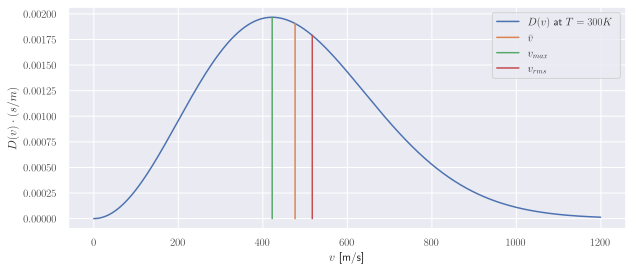

In [145]:
vel_range = np.arange(0, 1200)
v_max = v0
v_avg = np.sqrt(8 * con.k * 300 / np.pi / m)
v_rms = np.sqrt(3 * 300 * con.k / m)

plt.plot(vel_range, maxwell_dist(vel_range, 1), label='$D(v)$ at $T=300K$')
plt.plot([v_avg]*2,[0, maxwell_dist(v_avg)], label=r'$\bar{v}$')
plt.plot([v_max]*2,[0, maxwell_dist(v_max)], label=r'$v_{max}$')
plt.plot([v_rms]*2,[0, maxwell_dist(v_rms)], label=r'$v_{rms}$')
plt.ylabel(r'$D(v) \cdot (s/m)$')
plt.xlabel(f'$v$  [m/s]')
plt.legend()
plt.show()

### (c)
I use the Python `quad` to integrate numerically the `maxwell_dist` function.

In [130]:
print('Probability of finding a nitrogen molecule with speed'
f' between 300 and 572 is {quad(maxwell_dist, 1, 572)[0]:.2f}')

Probability of finding a nitrogen molecule with speed between 300 and 572 is 0.70
